In [284]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
from tensorflow.keras.layers.experimental import preprocessing

In [413]:
x = np.arange(0, 8, 0.1)
y = 3* np.sin(x) + 4

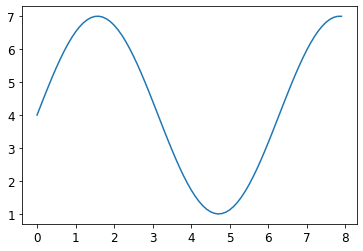

In [414]:
plt.plot(x,y)

In [415]:
len(x), len(y)

(80, 80)

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

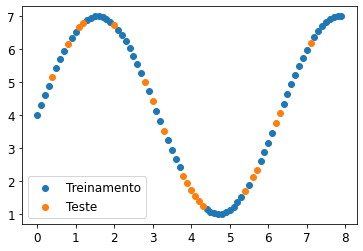

In [418]:
plt.scatter(X_train,y_train, label='Treinamento')
plt.scatter(X_test,y_test, label='Teste')
plt.legend()

In [419]:
X_train = tf.cast(tf.constant(X_train), dtype=tf.float32)
y_train = tf.expand_dims(tf.cast(tf.constant(y_train), dtype=tf.float32), axis=-1)

X_test = tf.cast(tf.constant(X_test), dtype=tf.float32)
y_test = tf.cast(tf.constant(y_test), dtype=tf.float32)

In [420]:
X_train = tf.expand_dims(X_train, axis=-1)

In [421]:
model2  = tf.keras.Sequential(name='my_rede')

model2.add(    tf.keras.layers.Dense(50,  activation='relu'))
model2.add(     tf.keras.layers.Dense(12, activation=tf.keras.activations.linear))
model2.add(     tf.keras.layers.Dense(5, activation=tf.keras.activations.linear))
model2.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))
    

model2.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mean_squared_error);

hist = model2.fit(X_train,y_train,batch_size=1, epochs=100, verbose=0);
y_predTrain = model2.predict(X_train)
y_predTest = model2.predict(X_test)

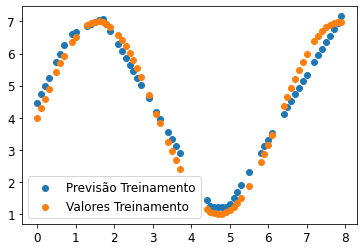

In [422]:
plt.scatter(X_train,y_predTrain,label='Previsão Treinamento')
plt.scatter(X_train,y_train,label='Valores Treinamento')


plt.legend()


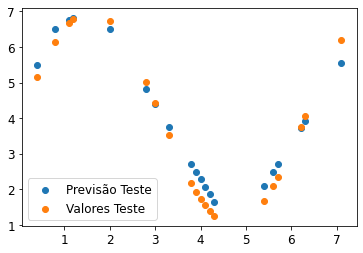

In [423]:
plt.scatter(X_test,y_predTest, label='Previsão Teste')
plt.scatter(X_test,y_test,label='Valores Teste')
plt.legend()

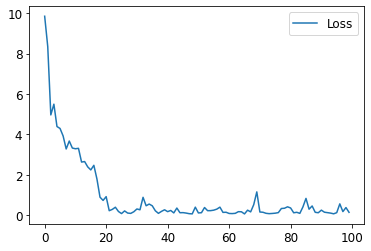

In [424]:
plt.plot(hist.history['loss'], label="Loss")

plt.legend()

In [425]:
tf.metrics.mean_squared_error(tf.constant(y_test),tf.squeeze(tf.constant(y_predTest)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.14094472>

In [426]:
tf.metrics.mean_absolute_error(tf.constant(y_test),tf.squeeze(tf.constant(y_predTest)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.32290092>

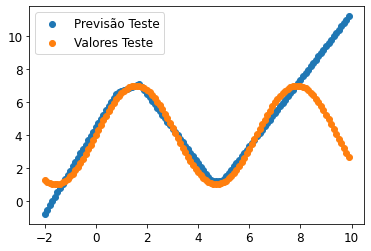

In [436]:
X_test2 = np.arange(-2,10,0.1)
y_test2 = 3* np.sin(X_test2) + 4
y_predTest2 = model2.predict(X_test2)
plt.scatter(X_test2,y_predTest2, label='Previsão Teste')
plt.scatter(X_test2,y_test2,label='Valores Teste')
plt.legend()

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 12.4722
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 8.2218
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 6.1103
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 5.4124
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 4.5100
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 3.9309
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 3.9602
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 3.4842
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 2.9783
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 3.1779
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 2.9872
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 2.8776
Epoch 13/100
13/13 [================

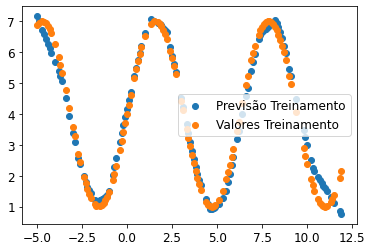

In [482]:
#Model 2

x = np.arange(-5, 12, 0.1)
y = 3* np.sin(x) + 4
X_train, X_test, y_train, y_test = train_test_split(x,y)
X_train = tf.cast(tf.constant(X_train), dtype=tf.float32)
y_train = tf.expand_dims(tf.cast(tf.constant(y_train), dtype=tf.float32), axis=-1)

X_test = tf.cast(tf.constant(X_test), dtype=tf.float32)
y_test = tf.cast(tf.constant(y_test), dtype=tf.float32)
X_train = tf.expand_dims(X_train, axis=-1)
model3  = tf.keras.Sequential(name='my_rede2')

model3.add(    tf.keras.layers.Dense(100,  tf.keras.activations.linear))
model3.add(     tf.keras.layers.Dense(50, activation=tf.keras.activations.relu))
model3.add(     tf.keras.layers.Dense(25, activation=tf.keras.activations.relu))
model3.add(     tf.keras.layers.Dense(10, activation=tf.keras.activations.linear))
model3.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))
    

model3.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mean_squared_error);

hist = model3.fit(X_train,y_train,batch_size=10, epochs=100, verbose=1);
y_predTrain = model3.predict(X_train)
y_predTest = model3.predict(X_test)
plt.scatter(X_train,y_predTrain,label='Previsão Treinamento')
plt.scatter(X_train,y_train,label='Valores Treinamento')


plt.legend()


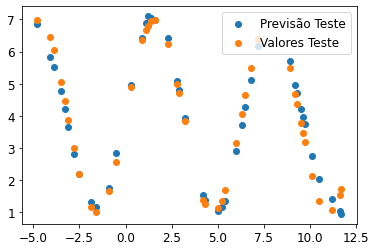

In [483]:
plt.scatter(X_test,y_predTest, label='Previsão Teste')
plt.scatter(X_test,y_test,label='Valores Teste')
plt.legend()

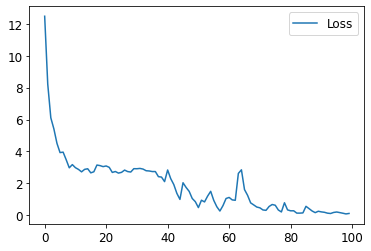

In [484]:
plt.plot(hist.history['loss'], label="Loss")

plt.legend()

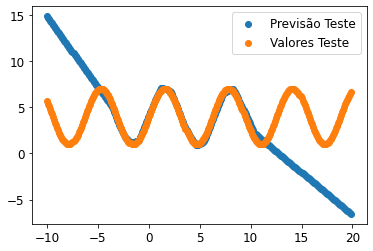

In [486]:
X_test2 = np.arange(-10,20,0.1)
y_test2 = 3* np.sin(X_test2) + 4
y_predTest2 = model3.predict(X_test2)
plt.scatter(X_test2,y_predTest2, label='Previsão Teste')
plt.scatter(X_test2,y_test2,label='Valores Teste')
plt.legend()